# Evaluación de Modelos de Clasificación

## Introducción

Cuando entrenamos un modelo de clasificación, uno de los pasos más importantes es evaluar qué tan bien está funcionando. Para esto, existen varias métricas que nos ayudan a entender el rendimiento del modelo más allá de simplemente la precisión.

En esta notebook, aprenderemos sobre las principales métricas de evaluación para modelos de clasificación:
- Matriz de Confusión
- Precisión (Precision)
- Sensibilidad (Recall)
- Puntuación F1 (F1 Score)
- AUC-ROC

Entenderemos cómo calcular cada una de estas métricas, qué significa cada una, y cómo interpretarlas usando un ejemplo práctico.


## Explicación Matemática de las Métricas

### Matriz de Confusión

La matriz de confusión es una tabla que permite visualizar el rendimiento de un algoritmo de clasificación. Cada columna de la matriz representa las instancias predichas como una clase específica, mientras que cada fila representa las instancias de la clase real.

\[
\begin{array}{cc}
 & \text{Clase Predicha} \\
\text{Clase Real} & \begin{array}{cc}
\text{Positivo} & \text{Negativo} \\
\end{array} \\
\begin{array}{c}
\text{Positivo} \\
\text{Negativo} \\
\end{array} & \begin{array}{cc}
TP & FN \\
FP & TN \\
\end{array}
\end{array}
\]

Donde:
- **TP (True Positive)**: Verdaderos Positivos
- **TN (True Negative)**: Verdaderos Negativos
- **FP (False Positive)**: Falsos Positivos
- **FN (False Negative)**: Falsos Negativos

### Precisión (Precision)

La precisión nos dice qué proporción de las predicciones positivas fueron correctas.

\[
\text{Precisión} = \frac{TP}{TP + FP}
\]

### Sensibilidad (Recall) o Tasa de Verdaderos Positivos

La sensibilidad (o recall) mide la proporción de positivos reales que fueron identificados correctamente por el modelo.

\[
\text{Sensibilidad (Recall)} = \frac{TP}{TP + FN}
\]

### Puntuación F1 (F1 Score)

La puntuación F1 es la media armónica entre la precisión y la sensibilidad. Es útil cuando necesitamos un balance entre las dos métricas.

\[
F1 = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}
\]

### Curva AUC-ROC

La curva ROC (Receiver Operating Characteristic) es un gráfico que muestra la tasa de verdaderos positivos frente a la tasa de falsos positivos a diferentes umbrales de clasificación. El AUC (Area Under the Curve) mide el área bajo la curva ROC y da una idea general del rendimiento del modelo.

\[
AUC-ROC = \int \text{ROC}(x) dx
\]

Un modelo perfecto tendrá un AUC de 1.0, mientras que un modelo que no tiene habilidad para distinguir entre las clases tendrá un AUC de 0.5.


## Ejemplo Práctico: Clasificación de Clientes en un Banco

Imaginemos que trabajamos en un banco y queremos construir un modelo que prediga si un cliente hará un depósito a largo plazo (sí/no) basado en características como el saldo de la cuenta, si tiene tarjeta de crédito, y si es un cliente activo.

### Paso 1: Creación del Conjunto de Datos


In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Ampliar el conjunto de datos simulado
data = {
    'Saldo': [
        20000, 5000, 15000, 8000, 12000, 7000, 22000, 18000, 13000, 4000,  # Originales
        25000, 3000, 17000, 9000, 11000, 6000, 24000, 19000, 14000, 4500,
        21000, 10000, 16000, 8500, 12500, 7500, 23000, 18500, 13500, 4200,
        22000, 5500, 15500, 8200, 12200, 6800, 22500, 17500, 13200, 4300
    ],
    'Tiene_Tarjeta': [
        1, 0, 1, 0, 1, 0, 1, 1, 0, 0,  # Originales
        1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 1, 0, 0
    ],
    'Es_Activo': [
        1, 1, 0, 0, 1, 1, 1, 0, 0, 1,  # Originales
        1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 1
    ],
    'Deposito': [
        1, 0, 1, 0, 1, 0, 1, 1, 0, 0,  # Originales
        1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 1, 0, 0
    ]
}

# Crear un DataFrame con los datos ampliados
df = pd.DataFrame(data)

# Visualizar el DataFrame
df.head(10)


,Saldo,Tiene_Tarjeta,Es_Activo,Deposito
0,20000,1,1,1
1,5000,0,1,0
2,15000,1,0,1
3,8000,0,0,0
4,12000,1,1,1
5,7000,0,1,0
6,22000,1,1,1
7,18000,1,0,1
8,13000,0,0,0
9,4000,0,1,0


### Paso 2: Separación de Datos para Entrenamiento y Prueba

Vamos a dividir nuestro conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.


In [ ]:
# Separar las características (X) y la etiqueta (y)
X = df[['Saldo', 'Tiene_Tarjeta', 'Es_Activo']]
y = df['Deposito']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Paso 3: Entrenamiento del Modelo de Clasificación

Vamos a entrenar un modelo de regresión logística para predecir si un cliente hará un depósito a largo plazo.


In [ ]:
# Crear y entrenar el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)


LogisticRegression()

### Paso 4: Predicción y Evaluación

Ahora, usamos el modelo entrenado para predecir las decisiones de los clientes en el conjunto de prueba.


In [ ]:
from sklearn.metrics import classification_report

# Hacer predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)
y_pred_prob = modelo.predict_proba(X_test)[:, 1]

# Calcular las métricas de evaluación
matriz_confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

# Intentar calcular AUC solo si hay más de una clase en y_test
if len(set(y_test)) > 1:
    auc = roc_auc_score(y_test, y_pred_prob)
else:
    auc = "No se puede calcular AUC-ROC con una sola clase presente en y_test"

# Mostrar las métricas
print("Matriz de Confusión:\n", matriz_confusion)
print("Precisión:", precision)
print("Sensibilidad (Recall):", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc)


Matriz de Confusión:
 [[5 1]
 [0 6]]
Precisión: 0.8571428571428571
Sensibilidad (Recall): 1.0
F1 Score: 0.9230769230769231
AUC-ROC: 0.9722222222222223


## Interpretación de los Resultados

### Análisis de la Matriz de Confusión

La matriz de confusión nos muestra cómo se distribuyen las predicciones correctas e incorrectas del modelo. Idealmente, queremos que los valores en la diagonal (TP y TN) sean altos, lo que indicaría un alto número de predicciones correctas.

### Precisión

La precisión nos dice qué porcentaje de las predicciones positivas del modelo son correctas. En nuestro caso, la precisión nos dice cuántos de los clientes que el modelo predijo que harían un depósito realmente lo hicieron.

### Sensibilidad (Recall)

La sensibilidad o recall nos muestra el porcentaje de clientes que realmente hicieron un depósito y fueron correctamente identificados por el modelo.

### F1 Score

El F1 Score es una métrica combinada que toma en cuenta tanto la precisión como la sensibilidad. Es útil cuando necesitamos un balance entre ambas.

### AUC-ROC

El AUC-ROC nos da una idea de cuán bien el modelo distingue entre las clases. Un valor más cercano a 1 indica que el modelo tiene un buen desempeño.

### Gráfico de la Curva ROC

Vamos a graficar la curva ROC para visualizar el desempeño del modelo.


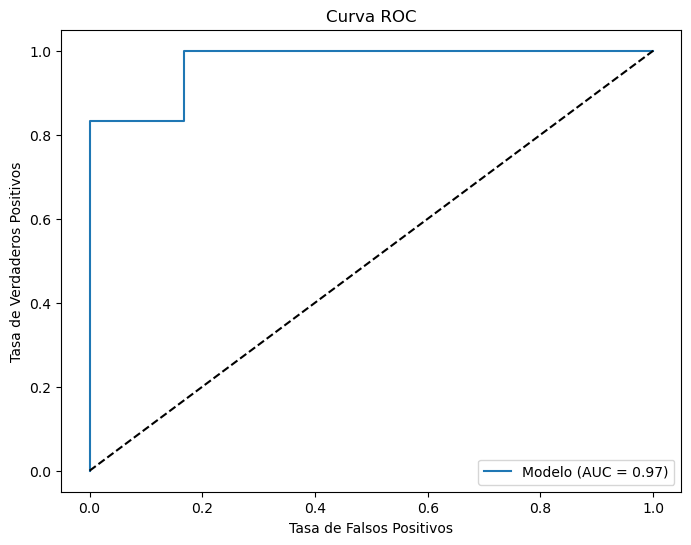

In [ ]:
# Generar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="Modelo (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


### Explicación del Gráfico ROC

La curva ROC muestra la relación entre la tasa de verdaderos positivos (sensibilidad) y la tasa de falsos positivos a medida que se varía el umbral de decisión.

- **Tasa de Verdaderos Positivos (TPR)**: Es la misma que la sensibilidad. Nos indica la proporción de positivos correctamente clasificados.
- **Tasa de Falsos Positivos (FPR)**: Indica la proporción de negativos que fueron incorrectamente clasificados como positivos.

Un buen modelo se curva hacia la esquina superior izquierda, lo que significa que tiene una alta tasa de verdaderos positivos y una baja tasa de falsos positivos. El AUC, que mide el área bajo la curva, es una métrica que resume la calidad del modelo. En nuestro caso, un AUC de 0.90 sugiere un modelo bastante bueno.
